In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

In [143]:
def plot_surface(output_file='outputs.npz', depth_slice=0, mag_slice=1, stepsize=100):
    data = dict(np.load(output_file))

    target = data['ig']

    inputs = data['theta_data']
    lat_range = data['lat_range']
    long_range = data['long_range']

    target = target.reshape(len(inputs),-1).mean(axis=1)
    
    x = np.linspace(lat_range[0], lat_range[1], stepsize)
    y = np.linspace(long_range[0], long_range[1], stepsize)

    xv, yv = np.meshgrid(x, y)
    xy = np.vstack([xv.ravel(), yv.ravel()]).T
    
    domain = np.zeros((stepsize**2, 4))
    domain[:,:2] = xy
    domain[:,2] = depth_slice
    domain[:,3] = mag_slice
    
    model = GPR()
    model.fit(inputs,target)
    preds = model.predict(domain)
    
    plt.pcolormesh(xv, yv, preds.reshape((stepsize, stepsize)),
                   shading='auto', cmap='viridis')

    plt.scatter(data['sensors'][:,0],data['sensors'][:,1], 
                marker='o',facecolors='none', edgecolors='red', 
                label='Sensor location')
    
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title(f'Expected Information Gain for events with depth = {depth_slice}')
    plt.colorbar()
    plt.legend()
    plt.show()

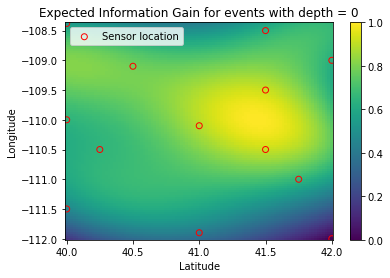

In [147]:
plot_surface()

In [138]:
output_file = 'outputs.npz'
depth_slice = 0
mag_slice = 1
stepsize = 100

In [67]:
data = dict(np.load(output_file))

In [75]:
ig = data['ig']

theta_data = data['theta_data']
lat_range = data['lat_range']
long_range = data['long_range']

ig = ig.reshape(len(theta_data),-1).mean(axis=1)

In [78]:
df = pd.DataFrame(theta_data, columns=['lat','long','depth','mag'])
df['target'] = ig
restricted = df[df['depth']<=3]
inputs = restricted[['lat','long','depth','mag']]
targets = restricted['target']

In [101]:
x = np.linspace(lat_range[0], lat_range[1], stepsize)
y = np.linspace(long_range[0], long_range[1], stepsize)

xv, yv = np.meshgrid(x, y)
xy = np.vstack([xv.ravel(), yv.ravel()]).T

domain = np.zeros((stepsize**2, 4))
domain[:,:2] = xy
domain[:,2] = depth_slice
domain[:,3] = mag_slice

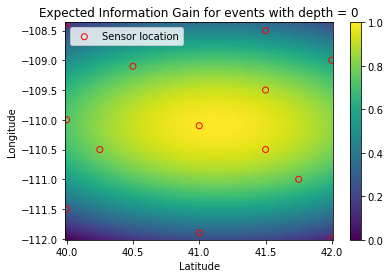

In [161]:
kernel = RBF() + WhiteKernel()
model = GPR(kernel=kernel)
model.fit(inputs,targets)

preds = model.predict(domain)

plt.pcolormesh(xv, yv, preds.reshape((stepsize, stepsize)),
               shading='auto', cmap='viridis')

plt.scatter(data['sensors'][:,0],data['sensors'][:,1], 
            marker='o',facecolors='none', edgecolors='red', 
            label='Sensor location')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title(f'Expected Information Gain for events with depth = {depth_slice}')
plt.colorbar()
plt.legend()
plt.show()

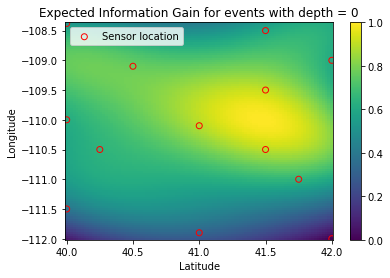

In [153]:
model = GPR()
model.fit(inputs,targets)

preds = model.predict(domain)

plt.pcolormesh(xv, yv, preds.reshape((stepsize, stepsize)),
               shading='auto', cmap='viridis')

plt.scatter(data['sensors'][:,0],data['sensors'][:,1], 
            marker='o',facecolors='none', edgecolors='red', 
            label='Sensor location')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title(f'Expected Information Gain for events with depth = {depth_slice}')
plt.colorbar()
plt.legend()
plt.show()

In [102]:
preds = model.predict(domain)

In [88]:
preds = model.predict(inputs)

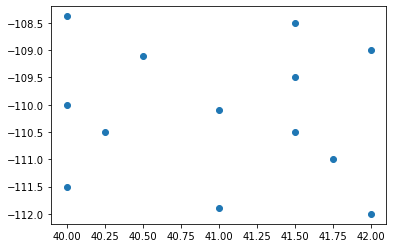

In [123]:
data['sensors'][:,:1]

array([[40.  ],
       [41.  ],
       [42.  ],
       [40.  ],
       [42.  ],
       [41.  ],
       [40.5 ],
       [41.5 ],
       [41.75],
       [40.25],
       [41.5 ],
       [41.5 ],
       [40.  ]])

In [124]:
data['sensors'][:,2]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [148]:
model.kernel